In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
id_df = pd.read_csv('../Data/train_identity.csv')
tr_df = pd.read_csv('../Data/train_transaction.csv')

In [5]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Identity

In [4]:
id_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
print(id_df.columns)
print(len(id_df.columns))
print(id_df.shape)

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')
41
(144233, 41)


In [6]:
id_df.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,140978.000000,127320.000000,80044.000000,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,99.745325,48.053071,-344.507146,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,1.127602,11.774858,93.695502,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,90.000000,10.000000,-660.000000,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,0.000000,100.000000,49.000000,-360.000000,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,0.000000,100.000000,64.000000,720.000000,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [6]:
id_df.isna().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [27]:
id_df.loc[:, id_df.dtypes == np.object].columns

Index(['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [7]:
id_df.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [28]:
for column in id_df.loc[:, id_df.dtypes == np.object].columns:
    unique = id_df[column].unique()
    print('--------------------\ncolumn: %s, # unique: %d' % (column, len(unique)))
    print(unique)

--------------------
column: id_12, # unique: 2
['NotFound' 'Found']
--------------------
column: id_15, # unique: 4
['New' 'Found' nan 'Unknown']
--------------------
column: id_16, # unique: 3
['NotFound' 'Found' nan]
--------------------
column: id_23, # unique: 4
[nan 'IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']
--------------------
column: id_27, # unique: 3
[nan 'Found' 'NotFound']
--------------------
column: id_28, # unique: 3
['New' 'Found' nan]
--------------------
column: id_29, # unique: 3
['NotFound' 'Found' nan]
--------------------
column: id_30, # unique: 76
['Android 7.0' 'iOS 11.1.2' nan 'Mac OS X 10_11_6' 'Windows 10' 'Android'
 'Linux' 'iOS 11.0.3' 'Mac OS X 10_7_5' 'Mac OS X 10_12_6'
 'Mac OS X 10_13_1' 'iOS 11.1.0' 'Mac OS X 10_9_5' 'Windows 7'
 'Windows 8.1' 'Mac' 'iOS 10.3.3' 'Mac OS X 10.12' 'Mac OS X 10_10_5'
 'Mac OS X 10_11_5' 'iOS 9.3.5' 'Android 5.1.1' 'Android 7.1.1'
 'Android 6.0' 'iOS 10.3.1' 'Mac OS X 10.9' 'iOS 11.1.1' 'Windows Vista

## Transaction

In [29]:
tr_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
print(tr_df.columns)
print(len(tr_df.columns))
print(tr_df.shape)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)
394
(590540, 394)


In [46]:
print(tr_df.columns.values)

['TransactionID' 'isFraud' 'TransactionDT' 'TransactionAmt' 'ProductCD'
 'card1' 'card2' 'card3' 'card4' 'card5' 'card6' 'addr1' 'addr2' 'dist1'
 'dist2' 'P_emaildomain' 'R_emaildomain' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6'
 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13' 'C14' 'D1' 'D2' 'D3' 'D4' 'D5'
 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13' 'D14' 'D15' 'M1' 'M2' 'M3'
 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8'
 'V9' 'V10' 'V11' 'V12' 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20'
 'V21' 'V22' 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'V29' 'V30' 'V31' 'V32'
 'V33' 'V34' 'V35' 'V36' 'V37' 'V38' 'V39' 'V40' 'V41' 'V42' 'V43' 'V44'
 'V45' 'V46' 'V47' 'V48' 'V49' 'V50' 'V51' 'V52' 'V53' 'V54' 'V55' 'V56'
 'V57' 'V58' 'V59' 'V60' 'V61' 'V62' 'V63' 'V64' 'V65' 'V66' 'V67' 'V68'
 'V69' 'V70' 'V71' 'V72' 'V73' 'V74' 'V75' 'V76' 'V77' 'V78' 'V79' 'V80'
 'V81' 'V82' 'V83' 'V84' 'V85' 'V86' 'V87' 'V88' 'V89' 'V90' 'V91' 'V92'
 'V93' 'V94' 'V95' 'V96' 'V97' 'V98' 'V99' 'V100' 'V101' 'V1

In [32]:
tr_df.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
                   ...  
V310                  12
V311                  12
V312                  12
V313                1269
V314                1269
V315                1269
V316                  12
V317                  12
V318                  12


In [37]:
tr_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [34]:
tr_df.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
                   ...   
V310              float64
V311              float64
V312              float64
V313              float64
V314              float64
V315              float64
V316              float64
V317        

In [38]:
tr_df.loc[:, tr_df.dtypes == np.object].columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')

In [36]:
for column in tr_df.loc[:, tr_df.dtypes == np.object].columns:
    unique = tr_df[column].unique()
    print('--------------------\ncolumn: %s, # unique: %d' % (column, len(unique)))
    print(unique)

--------------------
column: ProductCD, # unique: 5
['W' 'H' 'C' 'S' 'R']
--------------------
column: card4, # unique: 5
['discover' 'mastercard' 'visa' 'american express' nan]
--------------------
column: card6, # unique: 5
['credit' 'debit' nan 'debit or credit' 'charge card']
--------------------
column: P_emaildomain, # unique: 60
[nan 'gmail.com' 'outlook.com' 'yahoo.com' 'mail.com' 'anonymous.com'
 'hotmail.com' 'verizon.net' 'aol.com' 'me.com' 'comcast.net'
 'optonline.net' 'cox.net' 'charter.net' 'rocketmail.com' 'prodigy.net.mx'
 'embarqmail.com' 'icloud.com' 'live.com.mx' 'gmail' 'live.com' 'att.net'
 'juno.com' 'ymail.com' 'sbcglobal.net' 'bellsouth.net' 'msn.com' 'q.com'
 'yahoo.com.mx' 'centurylink.net' 'servicios-ta.com' 'earthlink.net'
 'hotmail.es' 'cfl.rr.com' 'roadrunner.com' 'netzero.net' 'gmx.de'
 'suddenlink.net' 'frontiernet.net' 'windstream.net' 'frontier.com'
 'outlook.es' 'mac.com' 'netzero.com' 'aim.com' 'web.de' 'twc.com'
 'cableone.net' 'yahoo.fr' 'yahoo.de

In [8]:
merged = id_df.merge(tr_df, on="TransactionID")

In [9]:
merged.shape

(144233, 434)

## my part: 
'TransactionID' 'isFraud' 'TransactionDT' 'TransactionAmt' 'ProductCD'
 'card1' 'card2' 'card3' 'card4' 'card5' 'card6' 'addr1' 'addr2' 'dist1'
 'dist2' 'P_emaildomain' 'R_emaildomain' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6'
 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13' 'C14' 'D1' 'D2' 'D3' 'D4' 'D5'
 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13' 'D14' 'D15' 'M1' 'M2' 'M3'
 'M4' 'M5' 'M6' 'M7' 'M8' 'M9'

In [10]:
columns = "'TransactionID' 'isFraud' 'TransactionDT' 'TransactionAmt' 'ProductCD' 'card1' 'card2' 'card3' 'card4' 'card5' 'card6' 'addr1' 'addr2' 'dist1' 'dist2' 'P_emaildomain' 'R_emaildomain' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13' 'C14' 'D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13' 'D14' 'D15' 'M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9'"
ind_columns = columns.split(' ')
my_cols = [col[1:-1] for col in ind_columns]

In [18]:
my_part = merged[my_cols]
my_part.iloc[5:20]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9
5,2987017,0,86668,100.000,H,11492,111.0,150.0,mastercard,219.0,credit,204.0,87.0,NaN,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987022,0,86786,50.000,H,1724,583.0,150.0,visa,226.0,credit,299.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0,87172,25.000,S,5463,399.0,150.0,american express,137.0,credit,330.0,87.0,NaN,98.0,NaN,gmail.com,1.0,2.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,93.0,1.0,0.0,96.0,1.0,542.0,542.0,NaN,NaN,NaN,537.0,4.0,29.0,0.0,520.0,NaN,NaN,NaN,NaN,541.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987040,0,87209,75.887,C,13329,569.0,117.0,visa,226.0,credit,NaN,NaN,NaN,NaN,gmail.com,gmail.com,2.0,5.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,3.0,2.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,83.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN
9,2987048,0,87317,42.294,C,15885,545.0,185.0,visa,138.0,debit,NaN,NaN,NaN,NaN,outlook.com,outlook.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN
10,2987049,0,87317,3.595,C,12730,266.0,185.0,mastercard,224.0,credit,NaN,NaN,NaN,149.0,anonymous.com,anonymous.com,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0,2.0,1.0,66.0,66.0,65.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,65.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN
11,2987057,0,87445,50.000,H,11839,490.0,150.0,visa,226.0,debit,204.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2987066,0,87660,300.000,H,15333,562.0,150.0,visa,226.0,credit,315.0,87.0,NaN,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2987069,0,87725,20.000,S,12866,303.0,150.0,visa,226.0,debit,330.0,87.0,NaN,84.0,NaN,hotmail.com,7.0,1.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,11.0,1.0,0.0,12.0,6.0,0.0,NaN,NaN,NaN,NaN,216.0,4.0,126.0,0.0,284.0,NaN,NaN,NaN,NaN,284.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2987070,0,87735,100.000,H,3682,264.0,150.0,visa,162.0,credit,325.0,87.0,NaN,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
my_part['card4'].unique()

array(['mastercard', 'visa', 'american express', 'discover', nan],
      dtype=object)

In [12]:
my_part.shape

(144233, 55)

In [32]:
my_part_cat = my_part.copy()
my_part_cat['card4'] = my_part['card4'].astype('category').cat.codes
my_part_cat['card6'] = my_part['card6'].astype('category').cat.codes

In [33]:
my_part_cat[my_part_cat.columns[1:]].corr()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
isFraud,1.000000,0.089427,0.015360,-0.034573,-0.058096,0.148459,0.025334,-0.047999,-0.040300,0.001758,-0.043792,NaN,-0.019132,0.034436,0.040319,-0.021697,0.023192,NaN,0.023176,0.024719,0.027660,NaN,0.021927,0.029325,0.029909,0.013125,0.014549,-0.042986,-0.102215,-0.046700,-0.047591,-0.147260,-0.061721,-0.129077,-0.142636,-0.044253,-0.072737,NaN,-0.030213,-0.059375,-0.008546,-0.063428
TransactionDT,0.089427,1.000000,-0.101800,0.029695,-0.003304,0.149162,0.010035,-0.091669,0.040391,0.026861,0.098615,NaN,-0.027024,-0.071912,-0.073538,0.004273,-0.069341,NaN,-0.069854,-0.081137,-0.078708,NaN,-0.081166,-0.073134,-0.080909,-0.071008,-0.068366,0.072038,-0.037769,-0.064300,0.028252,-0.048894,0.080545,-0.075575,-0.068752,-0.013735,0.070018,NaN,0.049447,0.024328,0.097536,0.019577
TransactionAmt,0.015360,-0.101800,1.000000,-0.016818,0.037015,-0.256826,-0.153439,0.015840,-0.210704,-0.010975,0.081034,NaN,0.023077,0.001511,-0.004267,0.015962,0.015445,NaN,0.016302,-0.034706,-0.014622,NaN,-0.019449,0.004857,-0.034731,-0.010034,0.019440,-0.024874,0.087216,0.066812,0.104246,0.117209,0.063517,0.107246,0.096806,0.073852,0.231619,NaN,-0.067624,0.041344,0.072131,0.122816
card1,-0.034573,0.029695,-0.016818,1.000000,0.019724,0.011529,0.094000,-0.199373,0.049655,0.028652,-0.004491,NaN,-0.003719,0.009859,0.009476,-0.009000,0.010894,NaN,0.010955,0.009695,0.009774,NaN,0.007918,0.010222,0.008842,0.008022,0.011302,-0.035273,-0.106061,-0.041233,-0.018235,-0.015140,-0.001674,-0.021924,-0.040851,-0.000275,0.029940,NaN,-0.020112,-0.028646,0.034944,-0.044105
card2,-0.058096,-0.003304,0.037015,0.019724,1.000000,-0.058512,-0.023153,0.028344,-0.121068,0.002628,-0.025915,NaN,0.014790,0.001423,0.000392,0.000340,0.003055,NaN,0.003042,0.000176,0.001700,NaN,0.001845,0.002587,0.000124,0.004854,0.004200,0.004290,-0.010975,-0.009128,-0.009060,0.018493,-0.003021,0.002996,0.028781,0.003446,0.039162,NaN,-0.014818,0.003530,0.017088,-0.002085
card3,0.148459,0.149162,-0.256826,0.011529,-0.058512,1.000000,0.076231,-0.199428,0.212572,0.015484,-0.451768,NaN,-0.143186,0.059324,0.067736,-0.045853,0.048190,NaN,0.048074,0.081097,0.067919,NaN,0.068324,0.056845,0.081851,0.053990,0.041926,0.049800,-0.041919,0.061291,0.022592,-0.024017,-0.071352,0.016093,-0.171774,-0.102086,-0.260034,NaN,0.109615,-0.026610,-0.067208,-0.123129
card4,0.025334,0.010035,-0.153439,0.094000,-0.023153,0.076231,1.000000,0.185907,0.252325,0.024661,-0.025652,NaN,0.007360,0.007560,0.008509,-0.025428,0.004440,NaN,0.004653,0.014136,0.010242,NaN,0.010316,0.006776,0.014205,0.005034,0.003424,-0.043112,-0.104936,-0.050099,-0.081413,-0.067535,-0.103680,-0.040019,-0.042450,-0.035364,-0.154923,NaN,-0.038876,-0.050969,-0.065014,-0.102794
card5,-0.047999,-0.091669,0.015840,-0.199373,0.028344,-0.199428,0.185907,1.000000,0.059680,-0.007450,0.048113,NaN,0.042352,-0.018927,-0.020524,0.006554,-0.016759,NaN,-0.016247,-0.024561,-0.021729,NaN,-0.020241,-0.018895,-0.024592,-0.021874,-0.015788,-0.002009,0.108459,0.042493,0.021402,0.025157,-0.002879,0.043679,0.075558,0.015995,-0.033152,NaN,0.007043,0.030642,-0.034674,0.058916
card6,-0.040300,0.040391,-0.210704,0.049655,-0.121068,0.212572,0.252325,0.059680,1.000000,-0.000969,-0.044312,NaN,-0.028115,0.013698,0.016174,-0.032073,0.009127,NaN,0.008900,0.029207,0.020886,NaN,0.025420,0.012742,0.028224,0.020545,0.007419,0.014597,-0.016701,-0.003990,-0.032789,-0.022088,-0.051860,-0.005070,-0.081089,-0.041131,-0.137829,NaN,0.012699,-0.000968,-0.049588,-0.058540
addr1,0.001758,0.026861,-0.010975,0.028652,0.002628,0.015484,0.024661,-0.007450,-0.000969,1.000000,0.000601,NaN,0.004686,-0.007821,-0.007756,0.002603,-0.007792,NaN,-0.008279,-0.004476,-0.005566,NaN,-0.004587,-0.007423,-0.003707,-0.001288,-0.007081,0.024421,-0.013242,-0.077648,0.000398,-0.009348,0.027323,-0.085690,0.001813,-0.002913,0.052913,NaN,0.04

In [13]:
my_part['isFraud'].describe()

count    144233.000000
mean          0.078470
std           0.268911
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: isFraud, dtype: float64

In [14]:
my_part['isFraud'].value_counts()

0    132915
1     11318
Name: isFraud, dtype: int64

In [16]:
my_part.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2                902
card3                172
card4                184
card5                956
card6                178
addr1              60447
addr2              60447
dist1             144233
dist2             106640
P_emaildomain      13391
R_emaildomain      13150
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                   218
D2                113117
D3                115174
D4                 79465
D5                111158
D6                 76860
D7                108093
D8                 69307
D9                 69307


/Users/jinoo/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jinoo/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


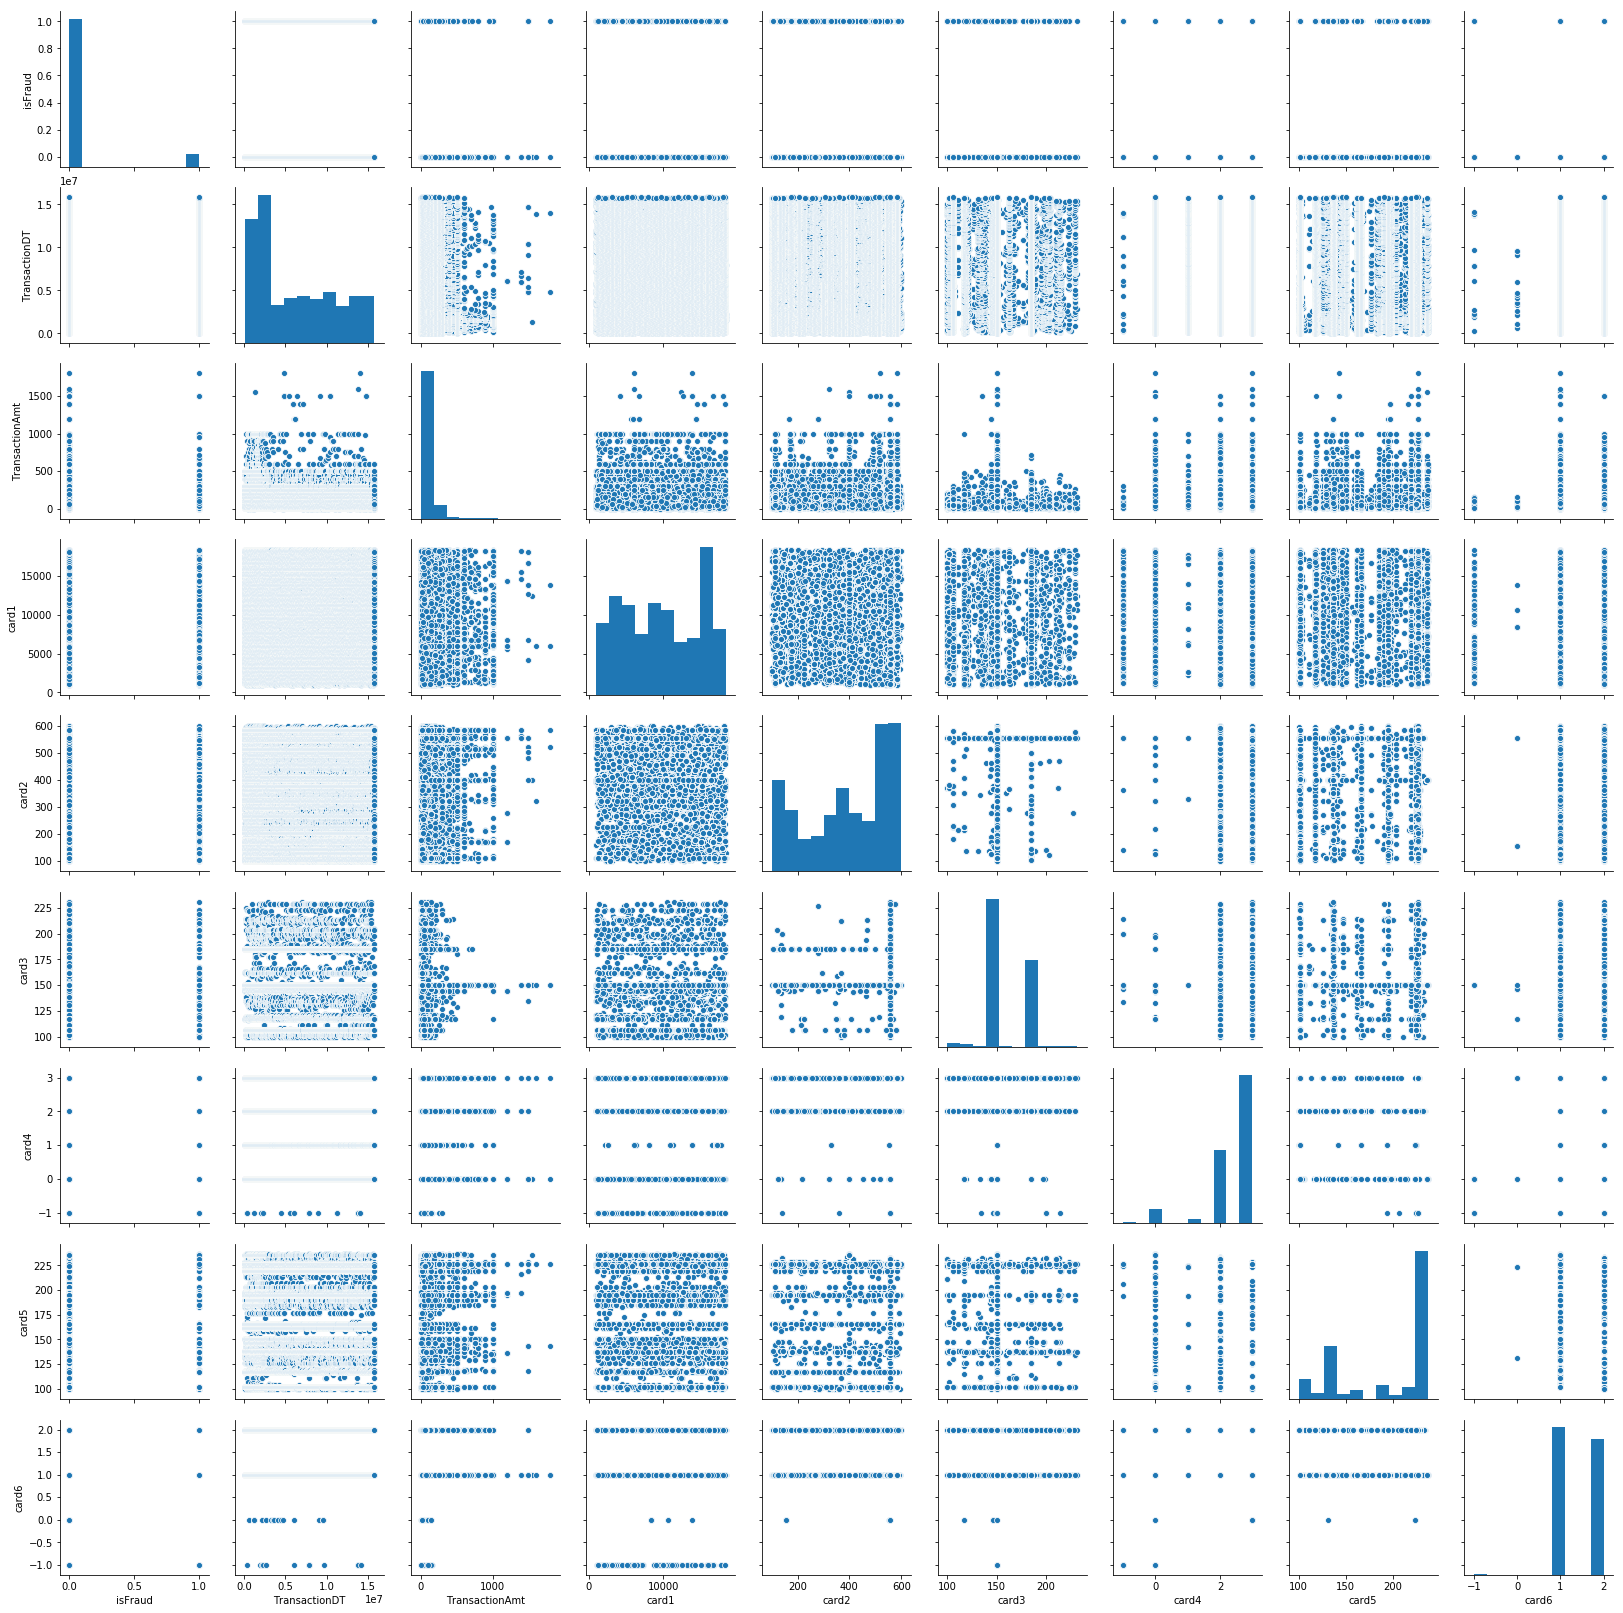

In [34]:
sns.pairplot(my_part_cat[['isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6']])